# Logistic Regression (Titanic)

In [163]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
plt.rcParams['figure.figsize']=(10.0,7.0)

#reading Data
titanic_data_train = pd.read_csv('titanic-train.csv')
titanic_data_test = pd.read_csv('titanic-test.csv')
# titanic_data=pd.concat([titanic_data_train,titanic_data_test])
titanic_data=titanic_data_train
print(titanic_data.shape)
titanic_data.head(10)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [101]:
print("# of passenger in training data:"+str(len(titanic_data.index)))

# of passenger in training data:1309


## Analyze Data

<IPython.core.display.Javascript object>


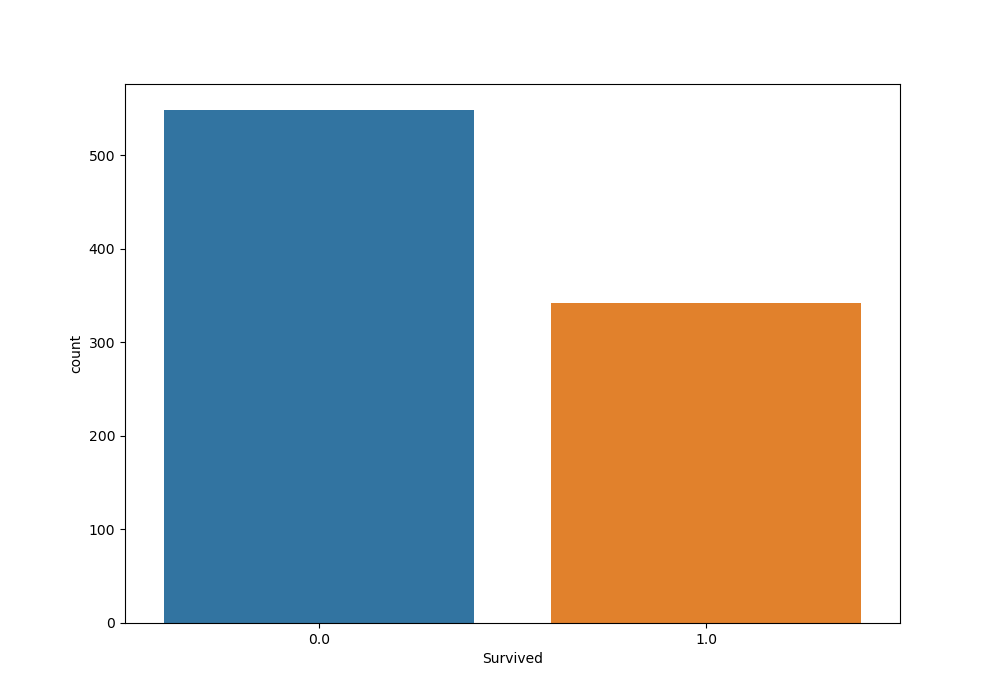

<AxesSubplot:xlabel='Survived', ylabel='count'>

In [102]:
sns.countplot(x="Survived", data=titanic_data)

<IPython.core.display.Javascript object>


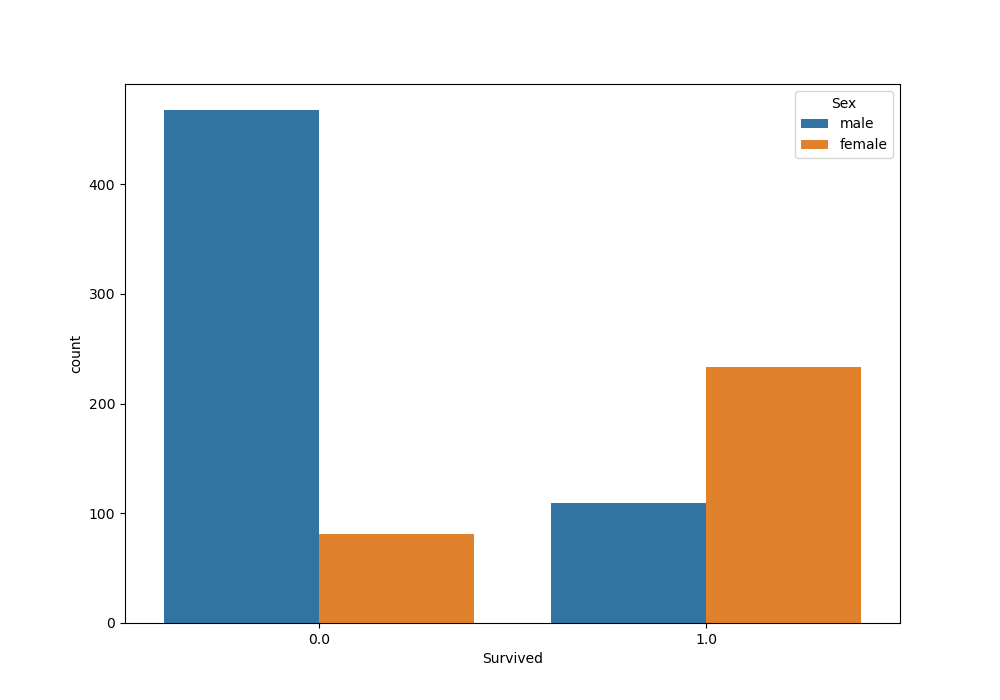

<AxesSubplot:xlabel='Survived', ylabel='count'>

In [103]:
sns.countplot(x="Survived", hue="Sex", data=titanic_data)

<IPython.core.display.Javascript object>


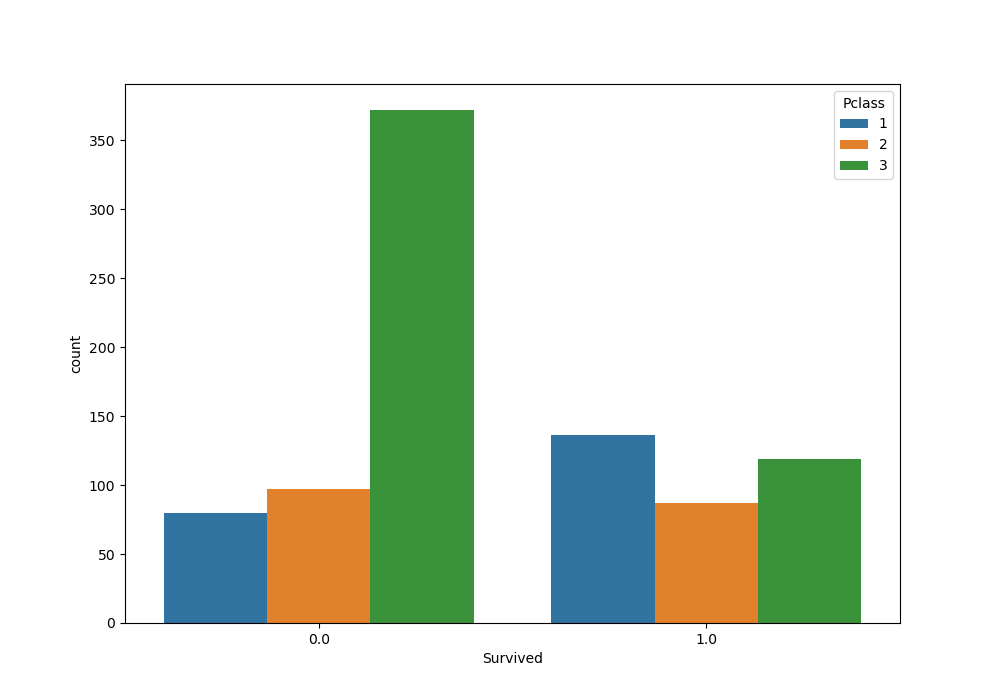

<AxesSubplot:xlabel='Survived', ylabel='count'>

In [104]:
sns.countplot(x="Survived", hue="Pclass", data=titanic_data)

<IPython.core.display.Javascript object>


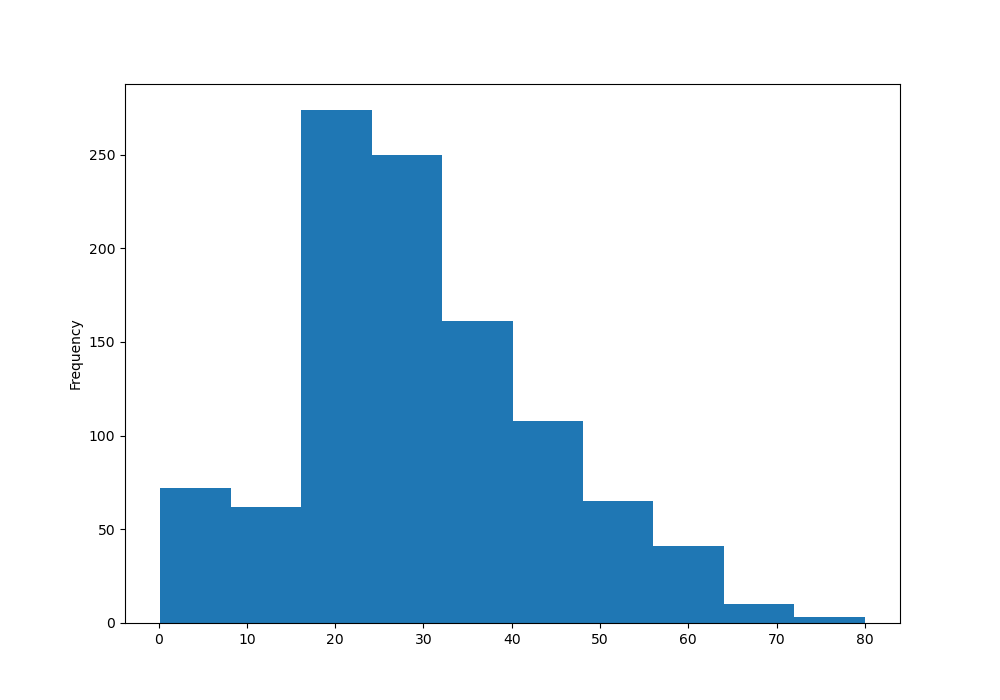

<AxesSubplot:ylabel='Frequency'>

In [105]:
titanic_data["Age"].plot.hist()

<IPython.core.display.Javascript object>


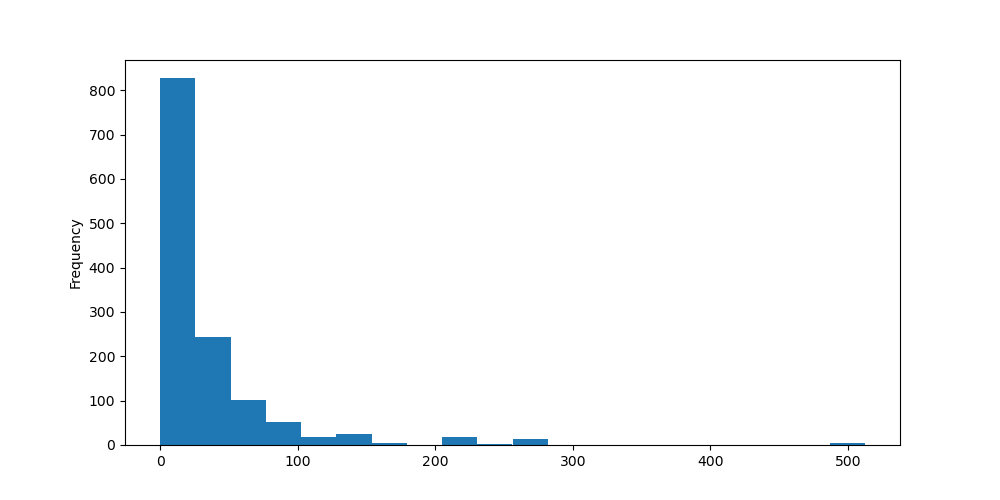

<AxesSubplot:ylabel='Frequency'>

In [106]:
titanic_data["Fare"].plot.hist(bins=20,figsize=(10,5))

In [107]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 165.2+ KB


<IPython.core.display.Javascript object>


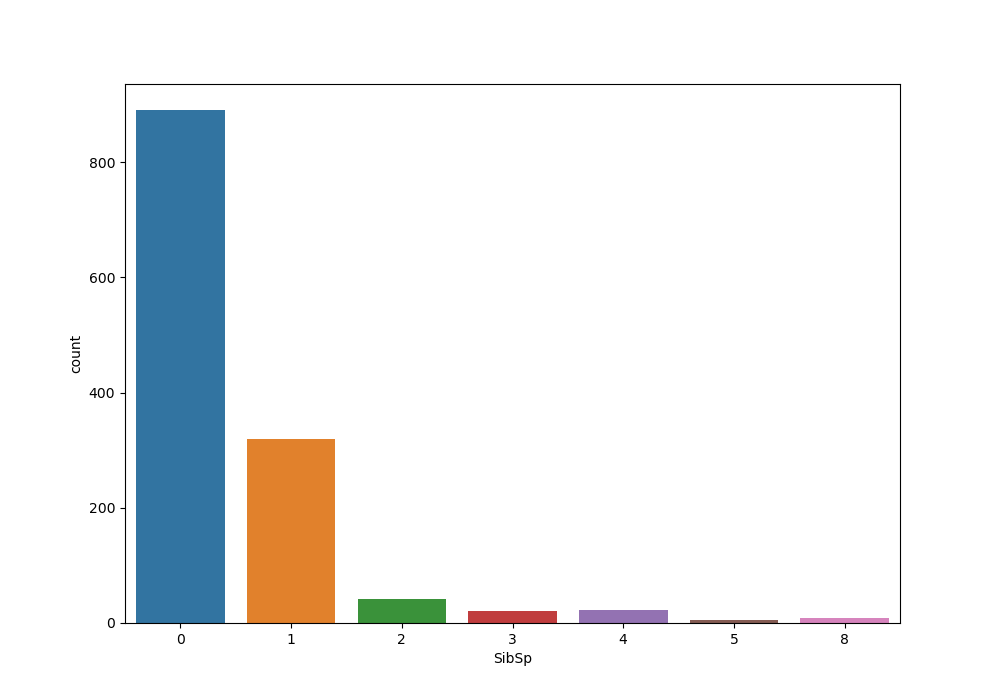

<AxesSubplot:xlabel='SibSp', ylabel='count'>

In [108]:
sns.countplot(x="SibSp", data=titanic_data)

## Data Wrangling

In [109]:
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,True,False,False,False,True,False,False,False,False,True,False
414,False,True,False,False,False,False,False,False,False,False,False,False
415,False,True,False,False,False,False,False,False,False,False,True,False
416,False,True,False,False,False,True,False,False,False,False,True,False


In [110]:
titanic_data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

<IPython.core.display.Javascript object>


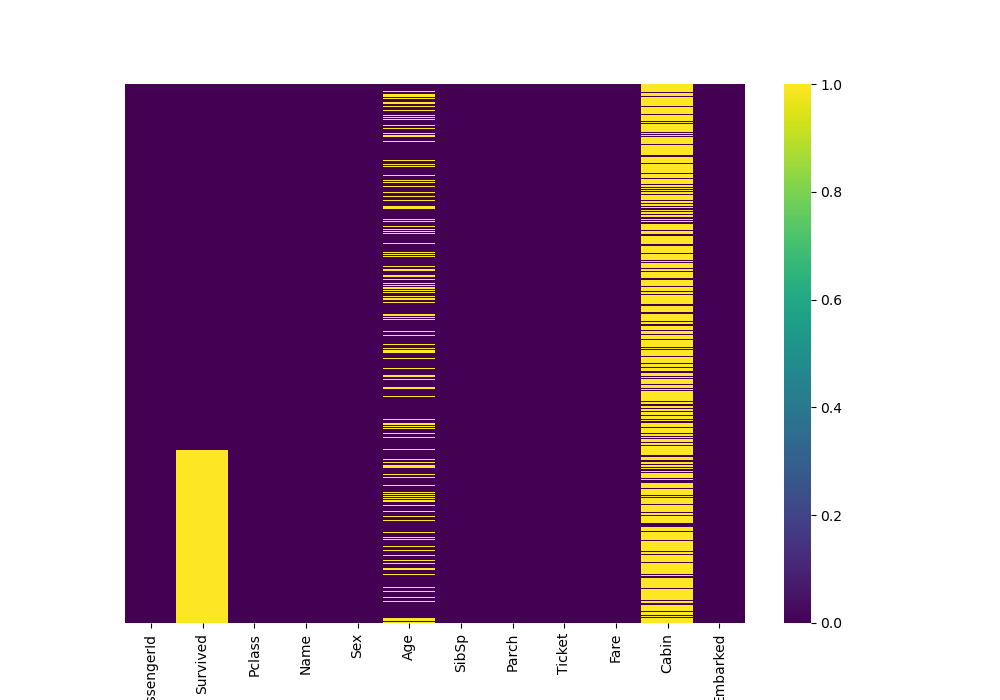

<AxesSubplot:>

In [113]:
sns.heatmap(titanic_data.isnull(),yticklabels=False,cmap="viridis")

<IPython.core.display.Javascript object>


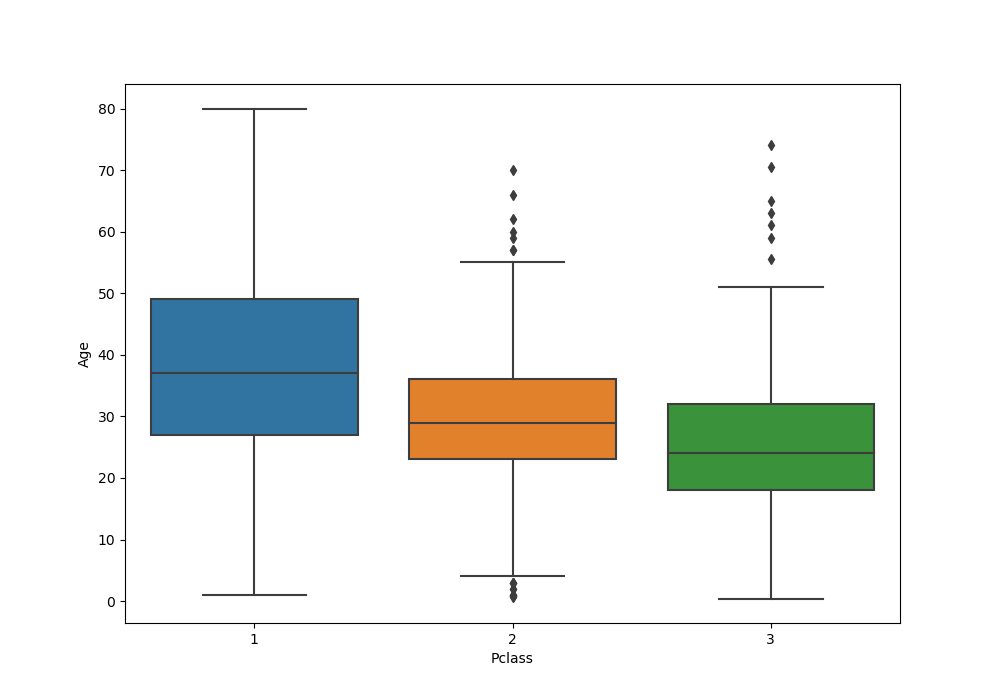

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

In [120]:
sns.boxplot(x="Pclass",y="Age",data=titanic_data)

### Drop sparse columns

In [115]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [164]:
titanic_data.drop("Cabin",axis=1,inplace=True)

In [117]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### split Train and test drop na

In [165]:
titanic_data.dropna(inplace=True)

<IPython.core.display.Javascript object>


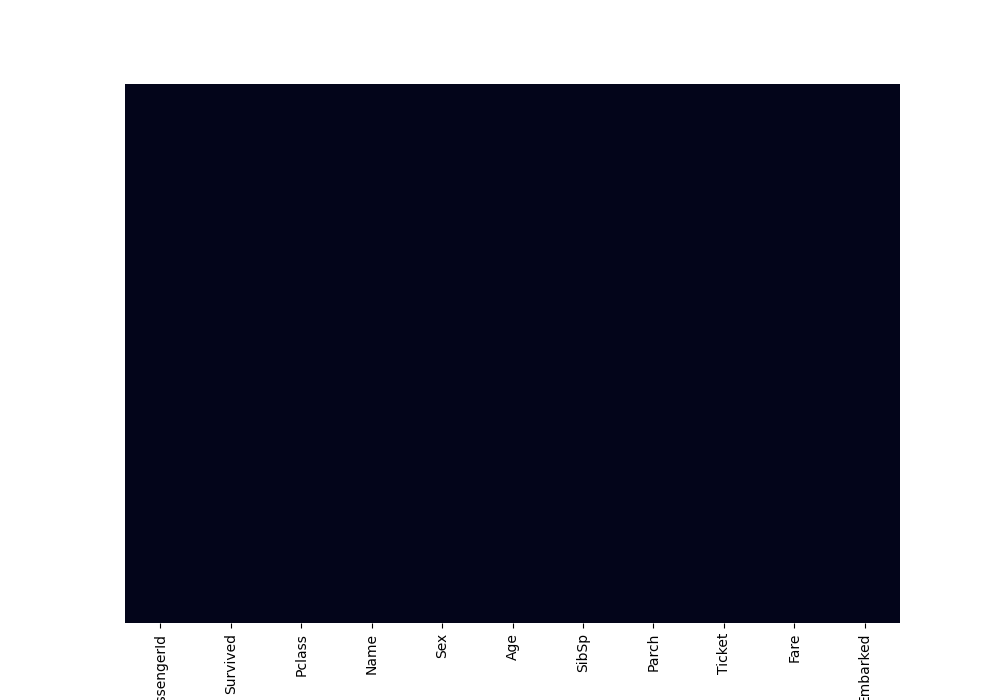

<AxesSubplot:>

In [121]:
sns.heatmap(titanic_data.isnull(),yticklabels=False,cbar=False)

In [130]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Other Data wrangling possibilities such as replace null value by data, mean...

But now we nee to change text data to categorical variable for logistic regression

In [131]:
pd.get_dummies(titanic_data["Sex"])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
885,1,0
886,0,1
887,1,0
889,0,1


In [166]:
sex=pd.get_dummies(titanic_data["Sex"],drop_first=True)
sex.head(5)

,male
0,1
1,0
2,0
3,0
4,1


In [167]:
embark=pd.get_dummies(titanic_data["Embarked"],drop_first=True)
embark.head(5)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [168]:
Pcl=pd.get_dummies(titanic_data["Pclass"],drop_first=True)
Pcl.head(5)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [169]:
titanic_data=pd.concat([titanic_data,sex,embark,Pcl],axis=1)
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [170]:
titanic_data.drop(["Pclass","Sex","Embarked","PassengerId","Name","Ticket"],axis=1,inplace=True)

In [137]:
titanic_data.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0.0,22.0,1,0,7.2500,1,0,1,0,1
1,1.0,38.0,1,0,71.2833,0,0,0,0,0
2,1.0,26.0,0,0,7.9250,0,0,1,0,1
3,1.0,35.0,1,0,53.1000,0,0,1,0,0
4,0.0,35.0,0,0,8.0500,1,0,1,0,1


## Train Data

In [171]:
titanic_data_test.drop("Cabin",axis=1,inplace=True)
titanic_data_test.dropna(inplace=True)
sex=pd.get_dummies(titanic_data_test["Sex"],drop_first=True)
embark=pd.get_dummies(titanic_data_test["Embarked"],drop_first=True)
Pcl=pd.get_dummies(titanic_data_test["Pclass"],drop_first=True)
titanic_data_test=pd.concat([titanic_data_test,sex,embark,Pcl],axis=1)
titanic_data_test.drop(["Pclass","Sex","Embarked","PassengerId","Name","Ticket"],axis=1,inplace=True)

In [138]:
X=titanic_data.drop("Survived",axis=1)
y=titanic_data["Survived"]

In [139]:
from sklearn.model_selection import train_test_split

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [141]:
from sklearn.linear_model import LogisticRegression

In [145]:
#logmodel=LogisticRegression()
logmodel=LogisticRegression(max_iter = 4000)

In [146]:
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=4000)

In [175]:
predictions = logmodel.predict(X_test)

In [176]:
predictions

array([1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0.])

In [174]:
from sklearn.metrics import classification_report

In [177]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n         0.0       0.80      0.81      0.81       126\n         1.0       0.72      0.72      0.72        88\n\n    accuracy                           0.77       214\n   macro avg       0.76      0.76      0.76       214\nweighted avg       0.77      0.77      0.77       214\n'

In [178]:
from sklearn.metrics import confusion_matrix

In [179]:
confusion_matrix(y_test,predictions)

array([[102,  24],
       [ 25,  63]])

    PN  PY
AN  102 24
AY  25  63

102+63 are coreect results

In [180]:
from sklearn.metrics import accuracy_score

In [181]:
accuracy_score(y_test,predictions)

0.7710280373831776

168/all => 78%